In [84]:
'''
Updated from Aug.27 version. 
1. Included peak probability for initial, teminal and single exon length distribution.
2. Locate the distribution (1. sort the probabilitys, 2. add up to 0.99)
3. find relation between GC and variance of distribution ????

Aug. 27 version
1. Fresh run on all genomes with the lastest GeneMark-ES
2. Parse GeneMark-ES output model file in the last run and plot exon/spacer/intron length distribution 
3. find connect between exon density and the exon/spacer/intron distribution
Build class ESModel, to extract information(spacer, exon, intron length distribution)
Parameters:

$SINGLE_DISTR
$INITIAL_DISTR
$EXON_DISTR
$TERMINAL_DISTR
$INTRON_DISTR

'''
import pandas as pd
import re
import numpy as np
import matplotlib.pylab as plt
% matplotlib inline
fulldata = pd.read_csv("../1_DataSmall/fullTableInfoGff3GffRNAESwithDensity20150829.csv")
fulldata.index = fulldata['shortName']

# The path where all the GeneMark-ES 4th run models located
modelFilePath = "/home/richard/largeDataSet/ES_Run_modfileAug2015/" 

plotPath = "../1_DataSmall/Plots/lengthDistribution/"

In [85]:
## Build class ESModel, to extract information(spacer, exon, intron length distribution)
## functions of max positon are similar but it's convenient to not consolidate as a single one
class ESModel():
    """Take in 4th run of model file as text and extract info"""
    def __init__(self, filename):
        self.f = open(filename)
    
    def maxSpacerPosition(self):
        '''
        return the position with the highest probability
        '''
        spacerData = []
        switch = False
        for line in self.f:
            if switch:
                spacerData.append(line)
            if "$BP_ACC_DISTR" in line:
                switch = True
            if "40\t" in line:
                switch = False
                break

        spacerData = map(lambda line: line.rstrip().split("\t"), spacerData)
        spacerDistr = map(lambda (a,b): float(b), spacerData)
        positionProb = np.array(spacerDistr)
        # print positionProb
        return range(2,41)[positionProb.argmax()]
    
    def maxSingleExonPosition(self, length = 9999):
        '''
        return the position with the highest probability
        location range from 300 to 9999
        '''
        exonData = []
        switch = False
        for line in self.f:
            if switch:
                exonData.append(line)
            if "$SINGLE_DISTR" in line:
                switch = True
            if switch and "{}\t".format(length) in line:
                switch = False
                break
        exonData = map(lambda line: line.rstrip().split("\t"), exonData)
        exonDistr = map(lambda (a,b): float(b), exonData)
        positionProb = np.array(exonDistr)
        # print positionProb
        try:
            return range(300,10000)[positionProb.argmax()]
        except:
            return 'NA'        

    def maxInitialExonPosition(self, length = 10000):
        '''
        return the position with the highest probability
        range from 3 to 10000
        '''
        exonData = []
        switch = False
        for line in self.f:
            if switch:
                exonData.append(line)
            if "$INITIAL_DISTR" in line:
                switch = True
            if switch and "{}\t".format(length) in line:
                switch = False
                break
        exonData = map(lambda line: line.rstrip().split("\t"), exonData)
        exonDistr = map(lambda (a,b): float(b), exonData)
        positionProb = np.array(exonDistr)
        # print positionProb
        try:
            return range(3,10001)[positionProb.argmax()]
        except:
            return 'NA'     
        
    def maxExonPosition(self, length = 10000):
        '''
        return the position with the highest probability
        '''
        exonData = []
        switch = False
        for line in self.f:
            if switch:
                exonData.append(line)
            if "$EXON_DISTR" in line:
                switch = True
            if switch and "{}\t".format(length) in line:
                switch = False
                break
        exonData = map(lambda line: line.rstrip().split("\t"), exonData)
        exonDistr = map(lambda (a,b): float(b), exonData)
        positionProb = np.array(exonDistr)
        # print positionProb
        try:
            return range(3,10001)[positionProb.argmax()]
        except:
            return 'NA'    
        
    def maxTerminalExonPosition(self, length = 10000):
        '''
        return the position with the highest probability
        '''
        exonData = []
        switch = False
        for line in self.f:
            if switch:
                exonData.append(line)
            if "$TERMINAL_DISTR" in line:
                switch = True
            if switch and "{}\t".format(length) in line:
                switch = False
                break
        exonData = map(lambda line: line.rstrip().split("\t"), exonData)
        exonDistr = map(lambda (a,b): float(b), exonData)
        positionProb = np.array(exonDistr)
        # print positionProb
        try:
            return range(3,10001)[positionProb.argmax()]
        except:
            return 'NA'             

    def maxIntronPosition(self, length = 3000):
            '''
            return the position with the highest probability
            '''
            intronData = []
            switch = False
            for line in self.f:
                if switch:
                    intronData.append(line)
                if "$INTRON_DISTR" in line:
                    switch = True
                if switch and "{}\t".format(length) in line:
                    switch = False
                    break

            intronData = map(lambda line: line.rstrip().split("\t"), intronData)
            intronDistr = map(lambda (a,b): float(b), intronData)
            positionProb = np.array(intronDistr)
            # print positionProb
            try:
                return range(20,3001)[positionProb.argmax()]
            except:
                return 'NA'

    def maxDonorToBpIntronPosition(self, length = 3000):
            '''
            return the position with the highest probability
            '''
            intronData = []
            switch = False
            for line in self.f:
                if switch:
                    intronData.append(line)
                if "$DON_BP_DISTR" in line:
                    switch = True
                if switch and "{}\t".format(length) in line:
                    switch = False
                    break

            intronData = map(lambda line: line.rstrip().split("\t"), intronData)
            intronDistr = map(lambda (a,b): float(b), intronData)
            positionProb = np.array(intronDistr)
            # print positionProb
            try:
                return range(5,3001)[positionProb.argmax()]
            except:
                return 'NA'
    def close(self):
        self.f.close()

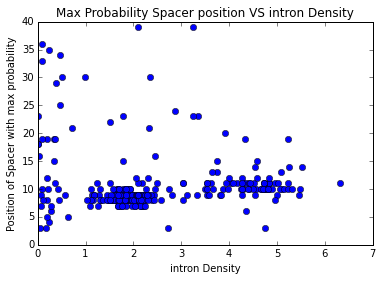

In [86]:
## generate plot of spacer length distribution and figure out the relation between intron density
## find the intron density VS max position
intronDensityExonDistrPair = []
modelFilePath = "/home/richard/largeDataSet/ES_Run_modfileAug2015/"
for shortName in fulldata.index:
    if fulldata.loc[shortName,'ES'] == 'pass':
        filepath = "{}{}{}".format(modelFilePath, shortName,".ES_C_4.mod")
        model = ESModel(filepath)
        ## make a list of 3-tuple, shortName, gc, maxSpacerPosition
        intronDensity1 = fulldata.loc[shortName,'intronDensityGff3']
        intronDensity2 = fulldata.loc[shortName,'intronDensityGff']
        intronDensity = intronDensity1 if pd.isnull(intronDensity1) else intronDensity2
        intronDensityExonDistrPair.append((shortName,intronDensity,model.maxSpacerPosition())) 
        model.close()
#         print filepath
data = np.array(intronDensityExonDistrPair)
plt.plot(data[:,1], data[:,2], "o")
plt.xlabel("intron Density")
plt.ylabel("Position of Spacer with max probability")
plt.title("Max Probability Spacer position VS intron Density")

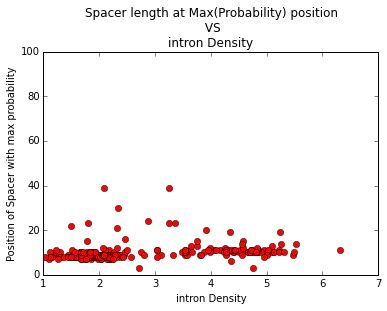

In [87]:
## get rid of the part with intron density < 1

## generate plot of spacer length distribution and figure out the relation between intron density
## find the intron density VS max position
intronDensityExonDistrPair = []
modelFilePath = "/home/richard/largeDataSet/ES_Run_modfileAug2015/"

f1 = fulldata['intronDensityGff3'] > 1
f2 = fulldata['intronDensityGff'] > 1
filteredData = fulldata[f1|f2]


for shortName in filteredData.index:
    if filteredData.loc[shortName,'ES'] == 'pass':
        filepath = "{}{}{}".format(modelFilePath, shortName,".ES_C_4.mod")
        model = ESModel(filepath)
        ## make a list of 3-tuple, shortName, gc, maxSpacerPosition
        intronDensity1 = filteredData.loc[shortName,'intronDensityGff3']
        intronDensity2 = filteredData.loc[shortName,'intronDensityGff']
        intronDensity = intronDensity1 if pd.isnull(intronDensity1) else intronDensity2
        # need to pair this with gc
        intronDensityExonDistrPair.append((shortName,filteredData.loc[shortName,'gc'],
                                           intronDensity,model.maxSpacerPosition())) 
        model.close()
#         print filepath
data = np.array(intronDensityExonDistrPair)
plt.plot(data[:,2], data[:,3], "or")
plt.xlabel("intron Density")
plt.ylabel("Position of Spacer with max probability")
plt.ylim([0,100])
# plt.title("Spacer position at Max(Probability) VS intron Density")
plt.title("Spacer length at Max(Probability) position \n VS \nintron Density")
plt.savefig("{}spacerVSintron.png".format(plotPath),bbox_inches='tight')

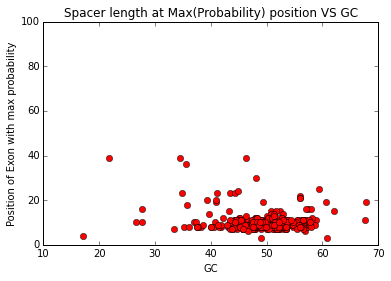

In [88]:
# plotting continue from last part, X = GC
plt.plot(data[:,1], data[:,3], "ro")
plt.xlabel("GC")
plt.ylabel("Position of Exon with max probability")
plt.ylim([0,100])
# plt.title("Exon position at max(Probability) VS Intron Density")
plt.title("Spacer length at Max(Probability) position VS GC")
plt.savefig("{}spacerVSgc.png".format(plotPath),bbox_inches='tight')

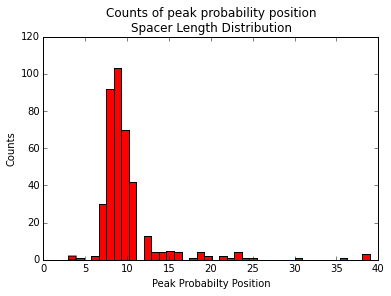

In [89]:
# peak probability distribution of spacer length distrbution
plt.hist(np.array(data[:,3],dtype = 'int'),bins=40,color = 'r')
plt.xlabel("Peak Probabilty Position")
plt.ylabel("Counts")
plt.title("Counts of peak probability position\nSpacer Length Distribution")
plt.savefig("{}histSpacerPeak.png".format(plotPath),bbox_inches='tight')

In [90]:
## generate plot of exon length distribution and figure out the relation between intron density
## find the intron density VS max position
intronDensityExonDistrPair = []
f1 = fulldata['intronDensityGff3'] > 1
f2 = fulldata['intronDensityGff'] > 1
filteredData = fulldata[f1|f2]
for shortName in filteredData.index:
    if filteredData.loc[shortName,'ES'] == 'pass':
        filepath = "{}{}{}".format(modelFilePath, shortName,".ES_C_4.mod")
        model = ESModel(filepath)
        ## make a list of 3-tuple, shortName, gc, maxSpacerPosition
        intronDensity1 = filteredData.loc[shortName,'intronDensityGff3']
        intronDensity2 = filteredData.loc[shortName,'intronDensityGff']
        intronDensity = intronDensity1 if pd.isnull(intronDensity1) else intronDensity2
        intronDensityExonDistrPair.append((shortName,filteredData.loc[shortName,'gc'],
                                           intronDensity,model.maxExonPosition())) # need to pair this with gc
        model.close()
#         print filepath
data = np.array(intronDensityExonDistrPair)

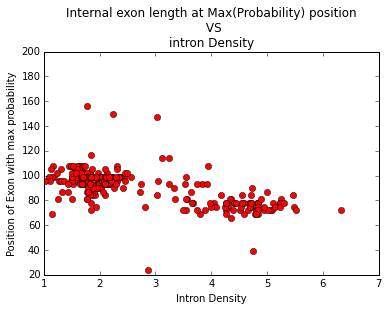

In [91]:
# plotting continue from last part, X = intron density
plt.plot(data[:,2], data[:,3], "or")
plt.xlabel("Intron Density")
plt.ylabel("Position of Exon with max probability")
plt.ylim([20,200])
# plt.title("Exon position at Max(Probability) VS Intron Density")
plt.title("Internal exon length at Max(Probability) position \n VS \nintron Density")
plt.savefig("{}exonVSintron.png".format(plotPath),bbox_inches='tight')

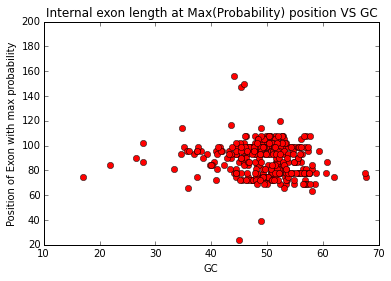

In [92]:
# plotting continue from last part, X = GC
plt.plot(data[:,1], data[:,3], "or")
plt.xlabel("GC")
plt.ylabel("Position of Exon with max probability")
plt.ylim([20,200])
# plt.title("Exon position at max(Probability) VS Intron Density")
plt.title("Internal exon length at Max(Probability) position VS GC")
plt.savefig("{}exonVSgc.png".format(plotPath),bbox_inches='tight')

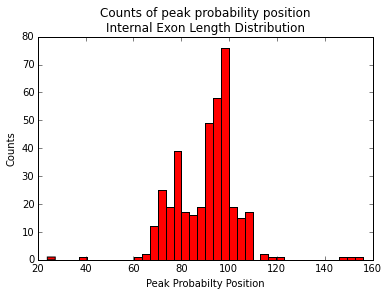

In [93]:
# peak probability distribution of internal exon length distrbution
plt.hist(np.array(data[:,3],dtype = 'int'),bins=40,color = 'r')
plt.xlabel("Peak Probabilty Position")
plt.ylabel("Counts")
plt.title("Counts of peak probability position\nInternal Exon Length Distribution")
plt.savefig("{}histExonPeak.png".format(plotPath),bbox_inches='tight')

In [94]:
## generate plot of intron length distribution and figure out the relation between intron density
## find the intron density VS max position
intronDensityIntronDistrPair = []
f1 = fulldata['intronDensityGff3'] > 1
f2 = fulldata['intronDensityGff'] > 1
filteredData = fulldata[f1|f2]
for shortName in filteredData.index:
    if filteredData.loc[shortName,'ES'] == 'pass':
        filepath = "{}{}{}".format(modelFilePath, shortName,".ES_C_4.mod")
        model = ESModel(filepath)
        ## make a list of 3-tuple, shortName, gc, maxSpacerPosition
        intronDensity1 = filteredData.loc[shortName,'intronDensityGff3']
        intronDensity2 = filteredData.loc[shortName,'intronDensityGff']
        intronDensity = intronDensity1 if pd.isnull(intronDensity1) else intronDensity2
        intronDensityIntronDistrPair.append((shortName,filteredData.loc[shortName,'gc'],
                                             intronDensity,model.maxIntronPosition())) # need to pair this with gc
        model.close()
#         print filepath
data = np.array(intronDensityIntronDistrPair)

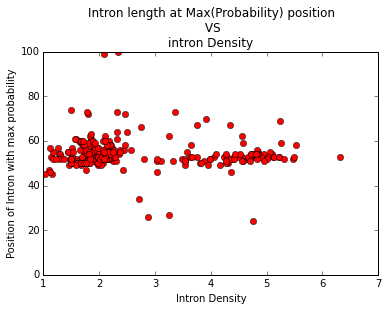

In [95]:
# plotting continue from last part, X = intron density
plt.plot(data[:,2], data[:,3], "or")
plt.xlabel("Intron Density")
plt.ylabel("Position of Intron with max probability")
plt.ylim([0,100])
# plt.title("Intron position at Max(Probability) VS Intron Density")
plt.title("Intron length at Max(Probability) position \n VS \nintron Density")
plt.savefig("{}intronVSintron.png".format(plotPath),bbox_inches='tight')

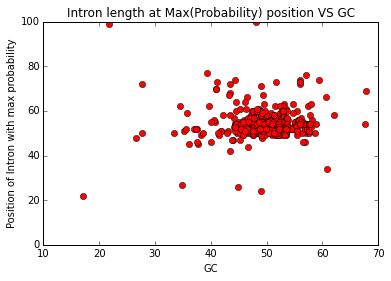

In [96]:
# plotting continue from last part, X = GC
plt.plot(data[:,1], data[:,3], "or")
plt.xlabel("GC")
plt.ylabel("Position of Intron with max probability")
plt.ylim([0,100])
# plt.title("Intron position at Max(Probability) VS GC")
plt.title("Intron length at Max(Probability) position VS GC")
plt.savefig("{}intronVSgc.png".format(plotPath),bbox_inches='tight')

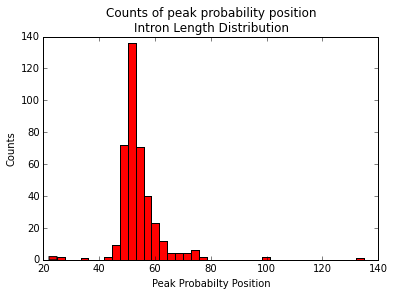

In [97]:
# peak probability distribution of intron length distrbution
plt.hist(np.array(data[:,3],dtype = 'int'),bins=40,color = 'r')
plt.xlabel("Peak Probabilty Position")
plt.ylabel("Counts")
plt.title("Counts of peak probability position\nIntron Length Distribution")
plt.savefig("{}histIntronPeak.png".format(plotPath),bbox_inches='tight')

In [98]:
## generate plot of donor to BP intron length distribution and figure out the relation between intron density
## find the intron density VS max position
intronDensityIntronDistrPair = []
f1 = fulldata['intronDensityGff3'] > 1
f2 = fulldata['intronDensityGff'] > 1
filteredData = fulldata[f1|f2]
for shortName in filteredData.index:
    if filteredData.loc[shortName,'ES'] == 'pass':
        filepath = "{}{}{}".format(modelFilePath, shortName,".ES_C_4.mod")
        model = ESModel(filepath)
        ## make a list of 3-tuple, shortName, gc, maxSpacerPosition
        intronDensity1 = filteredData.loc[shortName,'intronDensityGff3']
        intronDensity2 = filteredData.loc[shortName,'intronDensityGff']
        intronDensity = intronDensity1 if pd.isnull(intronDensity1) else intronDensity2
        # need to pair this with gc
        intronDensityIntronDistrPair.append((shortName,filteredData.loc[shortName,'gc'],
                                             intronDensity,model.maxDonorToBpIntronPosition())) 
        model.close()
#         print filepath
data = np.array(intronDensityIntronDistrPair)

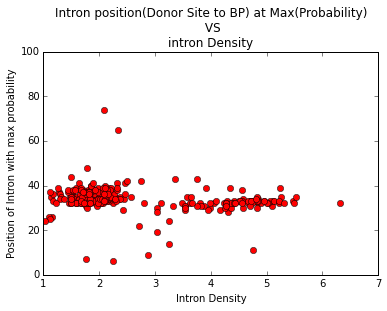

In [99]:
# plotting continue from last part, X = intron density
plt.plot(data[:,2], data[:,3], "or")
plt.xlabel("Intron Density")
plt.ylabel("Position of Intron with max probability")
plt.ylim([0,100])
# plt.title("Intron position(Donor Site to BP) at Max(Probability) VS Intron Density")
plt.title("Intron position(Donor Site to BP) at Max(Probability) \n VS \nintron Density")
plt.savefig("{}donorToBPVSintron.png".format(plotPath),bbox_inches='tight')

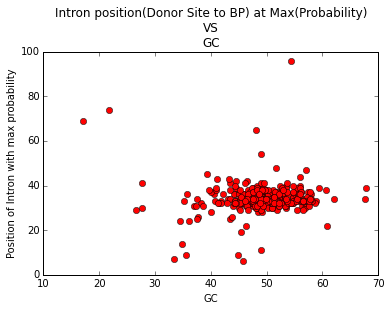

In [100]:
# plotting continue from last part, X = GC
plt.plot(data[:,1], data[:,3], "or")
plt.xlabel("GC")
plt.ylabel("Position of Intron with max probability")
plt.ylim([0,100])
plt.title("Intron position(Donor Site to BP) at Max(Probability) \nVS\nGC")
plt.savefig("{}donorToBPVSgc.png".format(plotPath),bbox_inches='tight')

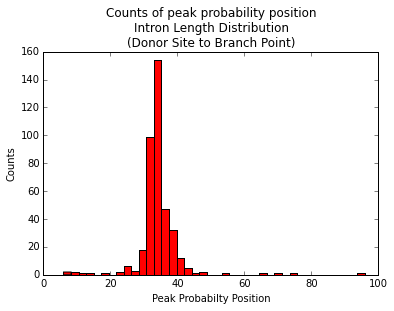

In [101]:
# peak probability distribution of intron length distrbution
plt.hist(np.array(data[:,3],dtype = 'int'),bins=40,color = 'r')
plt.xlabel("Peak Probabilty Position")
plt.ylabel("Counts")
plt.title("Counts of peak probability position\nIntron Length Distribution\n(Donor Site to Branch Point)")
plt.savefig("{}histIntronDonorToBpPeak.png".format(plotPath),bbox_inches='tight')

In [102]:
################################################################
################################################################
## new material start from here ##

## generate plot of single exon length distribution and figure out the relation between intron density
## find the intron density VS max position
intronDensityIntronDistrPair = []
f1 = fulldata['intronDensityGff3'] > 1
f2 = fulldata['intronDensityGff'] > 1
filteredData = fulldata[f1|f2]
for shortName in filteredData.index:
    if filteredData.loc[shortName,'ES'] == 'pass':
        filepath = "{}{}{}".format(modelFilePath, shortName,".ES_C_4.mod")
        model = ESModel(filepath)
        ## make a list of 3-tuple, shortName, gc, maxSpacerPosition
        intronDensity1 = filteredData.loc[shortName,'intronDensityGff3']
        intronDensity2 = filteredData.loc[shortName,'intronDensityGff']
        intronDensity = intronDensity1 if pd.isnull(intronDensity1) else intronDensity2
        # need to pair this with gc
        intronDensityIntronDistrPair.append((shortName,filteredData.loc[shortName,'gc'],
                                             intronDensity,model.maxSingleExonPosition())) 
        model.close()
#         print filepath
data = np.array(intronDensityIntronDistrPair)

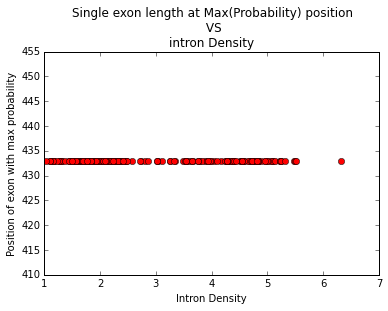

In [103]:
# plotting continue from last part, X = intron density
plt.plot(data[:,2], data[:,3], "or")
plt.xlabel("Intron Density")
plt.ylabel("Position of exon with max probability")
# plt.title("Intron position(Donor Site to BP) at Max(Probability) VS Intron Density")
plt.title("Single exon length at Max(Probability) position \n VS \nintron Density")
plt.savefig("{}singleVSintron.png".format(plotPath),bbox_inches='tight')

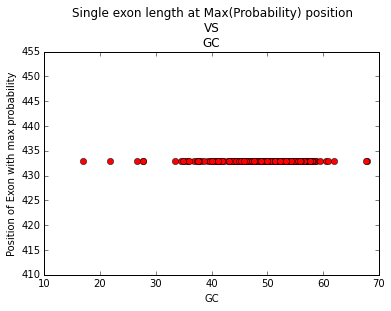

In [104]:
# plotting continue from last part, X = GC
plt.plot(data[:,1], data[:,3], "or")
plt.xlabel("GC")
plt.ylabel("Position of Exon with max probability")
plt.title("Single exon length at Max(Probability) position \nVS\nGC")
plt.savefig("{}singleVSgc.png".format(plotPath),bbox_inches='tight')

In [105]:
## generate plot of initial exon length distribution and figure out the relation between intron density
## find the intron density VS max position
intronDensityIntronDistrPair = []
f1 = fulldata['intronDensityGff3'] > 1
f2 = fulldata['intronDensityGff'] > 1
filteredData = fulldata[f1|f2]
for shortName in filteredData.index:
    if filteredData.loc[shortName,'ES'] == 'pass':
        filepath = "{}{}{}".format(modelFilePath, shortName,".ES_C_4.mod")
        model = ESModel(filepath)
        ## make a list of 3-tuple, shortName, gc, maxSpacerPosition
        intronDensity1 = filteredData.loc[shortName,'intronDensityGff3']
        intronDensity2 = filteredData.loc[shortName,'intronDensityGff']
        intronDensity = intronDensity1 if pd.isnull(intronDensity1) else intronDensity2
        # need to pair this with gc
        intronDensityIntronDistrPair.append((shortName,filteredData.loc[shortName,'gc'],
                                             intronDensity,model.maxInitialExonPosition())) 
        model.close()
#         print filepath
data = np.array(intronDensityIntronDistrPair)

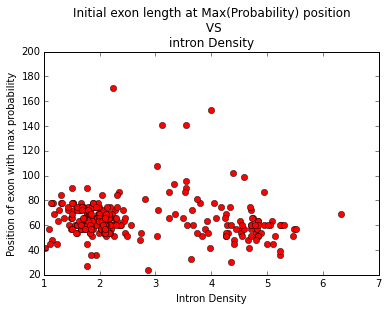

In [106]:
# plotting continue from last part, X = intron density
plt.plot(data[:,2], data[:,3], "or")
plt.xlabel("Intron Density")
plt.ylabel("Position of exon with max probability")
plt.ylim([20,200])
# plt.title("Intron position(Donor Site to BP) at Max(Probability) VS Intron Density")
plt.title("Initial exon length at Max(Probability) position \n VS \nintron Density")
plt.savefig("{}initialVSintron.png".format(plotPath),bbox_inches='tight')

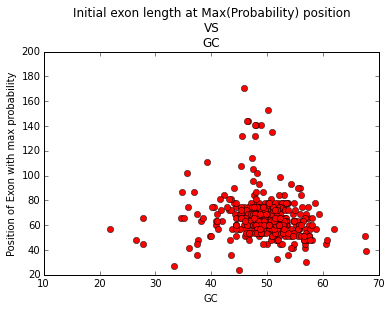

In [107]:
# plotting continue from last part, X = GC
plt.plot(data[:,1], data[:,3], "or")
plt.xlabel("GC")
plt.ylabel("Position of Exon with max probability")
plt.ylim([20,200])
plt.title("Initial exon length at Max(Probability) position \nVS\nGC")
plt.savefig("{}initialVSgc.png".format(plotPath),bbox_inches='tight')

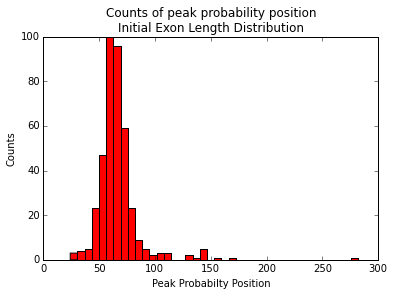

In [108]:
# peak probability distribution of intron length distrbution
plt.hist(np.array(data[:,3],dtype = 'int'),bins=40,color = 'r')
plt.xlabel("Peak Probabilty Position")
plt.ylabel("Counts")
plt.title("Counts of peak probability position\nInitial Exon Length Distribution")
plt.savefig("{}histInitialExonPeak.png".format(plotPath),bbox_inches='tight')

In [109]:
## generate plot of terminal exon length distribution and figure out the relation between intron density
## find the intron density VS max position
intronDensityIntronDistrPair = []
f1 = fulldata['intronDensityGff3'] > 1
f2 = fulldata['intronDensityGff'] > 1
filteredData = fulldata[f1|f2]
for shortName in filteredData.index:
    if filteredData.loc[shortName,'ES'] == 'pass':
        filepath = "{}{}{}".format(modelFilePath, shortName,".ES_C_4.mod")
        model = ESModel(filepath)
        ## make a list of 3-tuple, shortName, gc, maxSpacerPosition
        intronDensity1 = filteredData.loc[shortName,'intronDensityGff3']
        intronDensity2 = filteredData.loc[shortName,'intronDensityGff']
        intronDensity = intronDensity1 if pd.isnull(intronDensity1) else intronDensity2
        # need to pair this with gc
        intronDensityIntronDistrPair.append((shortName,filteredData.loc[shortName,'gc'],
                                             intronDensity,model.maxTerminalExonPosition())) 
        model.close()
#         print filepath
data = np.array(intronDensityIntronDistrPair)

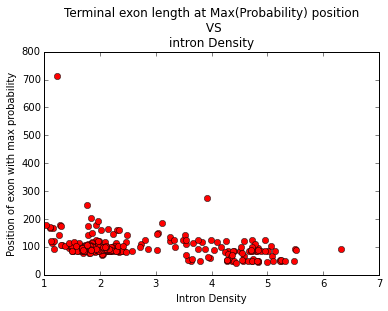

In [110]:
# plotting continue from last part, X = intron density
plt.plot(data[:,2], data[:,3], "or")
plt.xlabel("Intron Density")
plt.ylabel("Position of exon with max probability")
# plt.title("Intron position(Donor Site to BP) at Max(Probability) VS Intron Density")
plt.title("Terminal exon length at Max(Probability) position \n VS \nintron Density")
plt.savefig("{}terminalVSintron.png".format(plotPath),bbox_inches='tight')

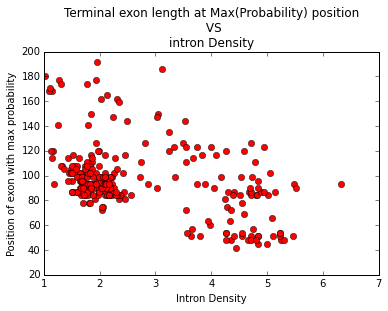

In [111]:
# plotting continue from last part, X = intron density,FixY
plt.plot(data[:,2], data[:,3], "or")
plt.xlabel("Intron Density")
plt.ylabel("Position of exon with max probability")
plt.ylim([20,200])
# plt.title("Intron position(Donor Site to BP) at Max(Probability) VS Intron Density")
plt.title("Terminal exon length at Max(Probability) position \n VS \nintron Density")
plt.savefig("{}terminalVSintronFixY.png".format(plotPath),bbox_inches='tight')

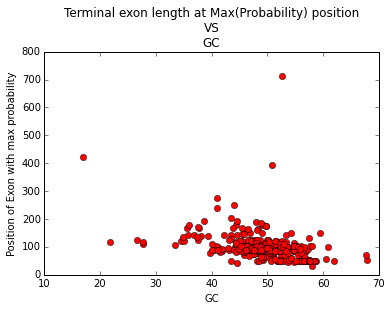

In [112]:
# plotting continue from last part, X = GC
plt.plot(data[:,1], data[:,3], "or")
plt.xlabel("GC")
plt.ylabel("Position of Exon with max probability")
plt.title("Terminal exon length at Max(Probability) position \nVS\nGC")
plt.savefig("{}terminalVSgc.png".format(plotPath),bbox_inches='tight')

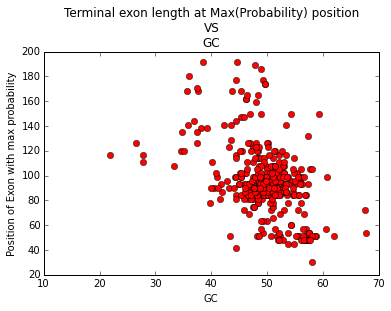

In [113]:
# plotting continue from last part, X = GC, fix y
plt.plot(data[:,1], data[:,3], "or")
plt.xlabel("GC")
plt.ylabel("Position of Exon with max probability")
plt.ylim([20,200])
plt.title("Terminal exon length at Max(Probability) position \nVS\nGC")
plt.savefig("{}terminalVSgcFixY.png".format(plotPath),bbox_inches='tight')

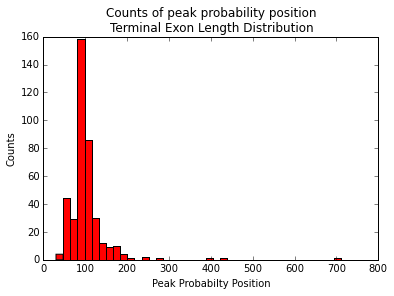

In [114]:
# peak probability distribution of terminal exon length distrbution
plt.hist(np.array(data[:,3],dtype = 'int'),bins=40,color = 'r')
plt.xlabel("Peak Probabilty Position")
plt.ylabel("Counts")
plt.title("Counts of peak probability position\nTerminal Exon Length Distribution")
plt.savefig("{}histTerminalExonPeak.png".format(plotPath),bbox_inches='tight')